<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Golfer's Scoring Average</h1>

### This model is designed to predict a golfer's scoring average based on 4 inputs

<h3 style='color:purple' align='left'>Background Part 1</h3>

The PGA tour (which is the highest level of professional golf similar to the NFL or MLB) has an 8 month season. 

Throughout the 8 month season, players work to accumulate Fedex Cup points by winning or finishing well at different tournaments. 

The season ends with a final tournament, called the Tour Championship. 

The Tour Championship works different that most golf tournaments. 

In most golf tournaments, all players start at the same score (Even Par or E)

However, the Tour Championship features a strokes-based system that was started in 2019. 

Under this system, the player with the most Fedex Cup points prior to the Tour Champtionship starts at -10 (Ten Under Par), while second place starts at -8, third place starts at -7, all the way down to players 26-30 starting at E. 

Meaning that if you have more Fedex Cup points prior to starting the tournament, you have a big advantage over the rest of the field. 

And if you win the Tour Championship, you get a hefty amount of money ($25 Million as of 2024). 

Therefore, it's not just important to win on the PGA tour, but it's also important to do well throughout the season so that you can get a lot of Fedex Cup points and give yourself the best chance of winning. 

One of the best measures of how consistently well a player is playing is their Scoring Average (i.e. the average score they shoot). 

<h3 style='color:purple' align='left'>Background Part 2</h3>

The PGA tour does a great job keeping detailed statistics. 

One of the measures they used is called "Strokes Gained," which breaks down into multiple categories:

- Strokes Gained Off the Tee (aka the first shot you hit)
- Strokes Gained Approach (aka after you hit your first shot, the shot(s) you hit onto the green)
- Strokes Gained Around the Green (when you miss the green, how well do you do)
- Strokes Gained Putting (how well do you putt)

How Strokes Gained works is that for each shot a player hits, they will compare that shot to if the average PGA tour player hit that shot. 

Meaning that if the player did better than the PGA tour average, they will "gain strokes."

And if they did worse than the PGA tour aver, they will "lose strokes."

The easiest example to explain this is a simple 3 foot putt.  

On average, PGA tour players make 96% of 3 foot putts (according to research by Columbia University professor Mark Broadie). 

Meaning that if a player makes a 3 foot putt, they gain 0.04 strokes on the field. 

And if they miss a 3 foot putt, they lose .96 strokes. 

### Hope that makes sense. Now on to coding!!

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("final_dataset.csv")
df.head()

,PLAYER_ID,PLAYER_NAME,scoring_average,SG_OTT,SG_APP,SG_ATG,SG_PUTTING
0,12716,Charley Hoffman,71.178,0.012,0.126,0.013,-0.098
1,22371,Aaron Baddeley,70.998,-0.781,-0.372,0.630,0.758
2,22405,Justin Rose,72.090,-0.163,-0.773,0.065,0.264
3,23108,Matt Kuchar,71.986,-0.127,-1.137,0.185,0.221
4,23320,Ryan Palmer,71.802,0.300,-0.388,0.017,-0.686


#### SG_OTT -> Strokes Gained Off the Tee
#### SG_APP -> Strokes Gained Approach
#### SG_ATG -> Stroked Gained Around the Green
#### SG_Putting -> Strokes Gained Putting

In [3]:
df.isnull().sum()

PLAYER_ID          0
PLAYER_NAME        0
scoring_average    0
SG_OTT             0
SG_APP             0
SG_ATG             0
SG_PUTTING         0
dtype: int64

In [5]:
df.shape

(186, 7)

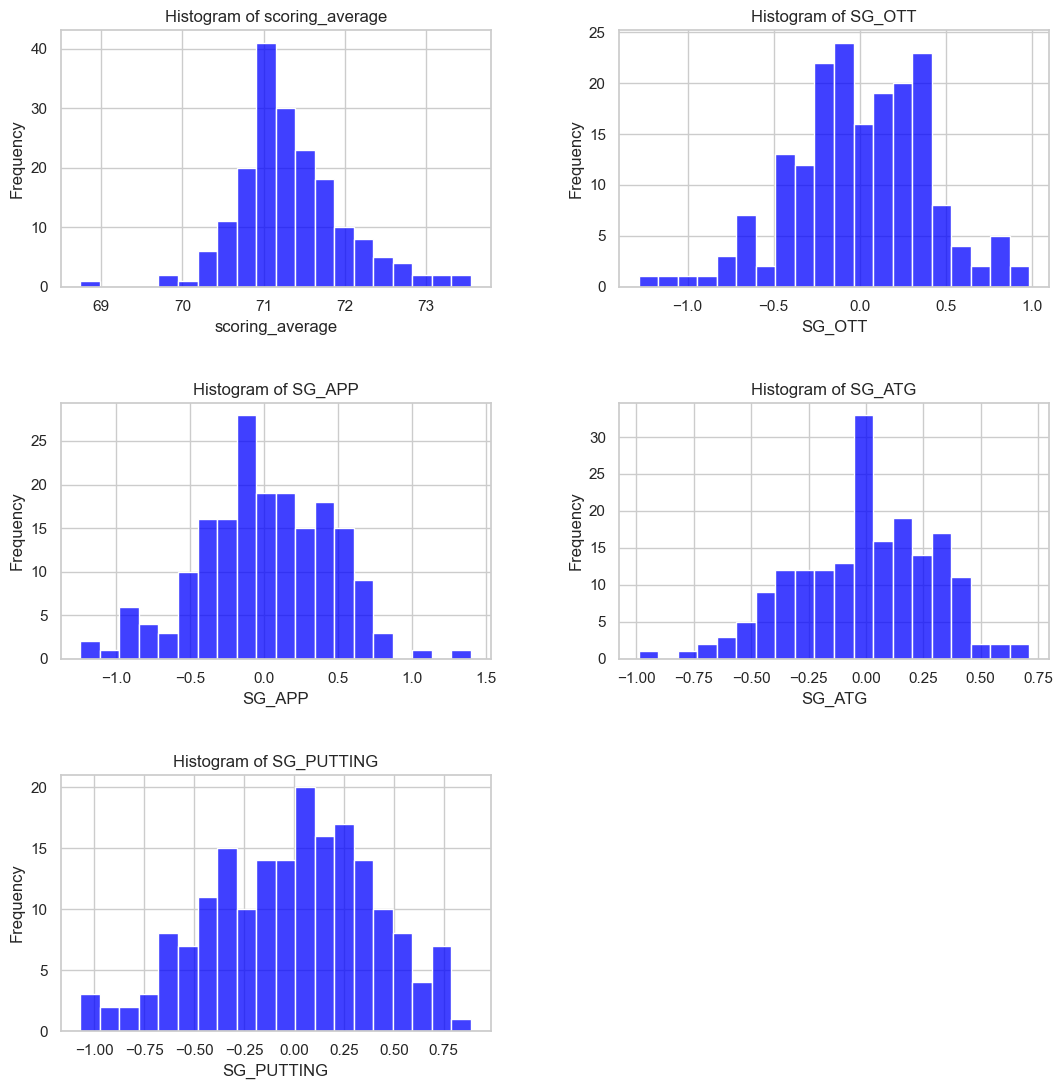

In [9]:
# Create some histograms to show the different ranges

import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Set up the figure and axes for a 3x2 grid of plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)

# List of columns to plot
columns = ['scoring_average', 'SG_OTT', 'SG_APP', 'SG_ATG', 'SG_PUTTING']

# Plot histograms with Seaborn
for ax, column in zip(axes.flatten(), columns):
    sns.histplot(df[column], bins=20, kde=False, color='blue', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplot (if any)
if len(columns) < 6:
    fig.delaxes(axes.flatten()[len(columns)])

plt.show()

In [14]:
df.scoring_average.mean()

71.334

In [11]:
df.scoring_average.std()

0.6867242571843557

In [16]:
min_scoring_average = df.scoring_average.mean() - 3*df.scoring_average.std()

min_scoring_average

69.27382722844693

In [17]:
df[(df.scoring_average<min_scoring_average)]

,PLAYER_ID,PLAYER_NAME,scoring_average,SG_OTT,SG_APP,SG_ATG,SG_PUTTING
106,46046,Scottie Scheffler,68.743,0.957,1.398,0.48,0.016


In [18]:
max_scoring_average = df.scoring_average.mean() + 3*df.scoring_average.std()

max_scoring_average

73.39417277155307

In [19]:
df[(df.scoring_average>max_scoring_average)]

,PLAYER_ID,PLAYER_NAME,scoring_average,SG_OTT,SG_APP,SG_ATG,SG_PUTTING
30,29478,Kevin Kisner,73.556,-1.053,-0.73,-0.605,0.105


There may be a few outliers, I am going to leave them in for now because we already don't have a ton of data 

In [24]:
X = df.drop(['scoring_average','PLAYER_ID',"PLAYER_NAME"],axis='columns')
X.head()

,SG_OTT,SG_APP,SG_ATG,SG_PUTTING
0,0.012,0.126,0.013,-0.098
1,-0.781,-0.372,0.630,0.758
2,-0.163,-0.773,0.065,0.264
3,-0.127,-1.137,0.185,0.221
4,0.300,-0.388,0.017,-0.686


In [25]:
y = df['scoring_average']
y.head()

0    71.178
1    70.998
2    72.090
3    71.986
4    71.802
Name: scoring_average, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [28]:
# Build V1 of the model

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8579846243642086

<h3 style='color:purple'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h3>

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87130066, 0.88496512, 0.84745276, 0.84725476, 0.8334423 ])

#### In 5 iterations we get a score above 80% all the time. This is pretty good, but let's also test few other algorithms for regression to see if we can get even better score. 

#### We will use GridSearchCV for this purpose

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

In [33]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
        'model': pipeline,
        'params': {
            'linear_regression__fit_intercept': [True, False],
            'linear_regression__positive': [True, False]
        }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/s

,model,best_score,best_params
0,linear_regression,0.856883,"{'linear_regression__fit_intercept': True, 'li..."
1,lasso,-0.047975,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.448484,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on above results, LinearRegression is the only one with a decent score. We will use that!**

<h3 style='color:purple'>Let's Test Our Model Now!</h3>

In [35]:
def predict_scoring_avg(sc_ott, sg_app, sg_atg, sg_putting):    
    
    x = np.zeros(len(X.columns))
    x[0] = sc_ott
    x[1] = sg_app
    x[2] = sg_atg
    x[3] = sg_putting

    return model1.predict([x])[0]

In [36]:
predict_scoring_avg(-0.5,1.0, 0.5, -1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.31440694283292

In [37]:
predict_scoring_avg(0.5,1.0, 0, 0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.15148630332642

In [38]:
predict_scoring_avg(-0.5,-1.0, 0, 0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.48985032259382

<h3 style='color:purple'>Export the tested model to a pickle file</h3>

In [39]:
import pickle
with open('scoring_avg_model.pickle','wb') as f:
    pickle.dump(model1,f)

<h3 style='color:purple'>Export location and column information to a file that will be useful later on in our prediction application</h3>

In [40]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))